## Display falsely recognized images

In [49]:
import os
import ast
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# convert data points to images
dim = (200, 200)

# datapoint to image conversion
def draw_to_img(datapoints):

    images = []
    i =0
    for data in datapoints:
        #stroke = ast.literal_eval(stroke)
        fig, ax = plt.subplots()
        
        for x,y in data:
            ax.invert_yaxis()
            ax.plot(x, y, linewidth=12)
            ax.axis('off')
        #render figure
        fig.canvas.draw()
        
        X = np.array(fig.canvas.renderer._renderer)
        plt.close("all")
        plt.clf()
        
        # resize, normalize and invert the image
        X = (cv2.resize(X, dim) / 255.)[::-1]
        # channels
        X = X[:, :, 3]
            
        print('processed {}/{}'.format(i+1,len(datapoints)),end = '\r', flush=True)
        i+=1
        plt.close(fig)
        images.append(X)
            
    print("\n")
    print ('Finished!')  
    images_conv = np.array(images)    
    return images_conv


In [51]:
# see contenst in data folder
print(os.listdir("data"))

['test_simplified.csv', 'train_simplified.zip', 'train_simplified']


In [52]:
TRAIN_PATH = "data/train_simplified/"
TEST_PATH = "data/test_simplified.csv"
SUBMISSION_NAME = 'submission.csv'

* go the each csv file in training 
* read nrwos of data from all of the csv files in the train_simplified
* set nrows to **None** to get **all** the data from **all** csv files in the train_simplified folder


In [53]:
train = pd.DataFrame()
for file in os.listdir(TRAIN_PATH)[:10]:
    train = train.append(pd.read_csv(TRAIN_PATH + file, usecols=[1, 3, 5], nrows=1000))

#shuffle the data
train = shuffle(train, random_state=123)

In [54]:
train.head()

,drawing,recognized,word
656,"[[[75, 66, 46, 76, 90, 86, 67, 83, 109, 116, 1...",True,tornado
445,"[[[162, 153, 149, 145, 141, 143], [248, 252, 2...",False,lollipop
505,"[[[4, 15, 29, 60, 125, 172, 209, 244, 255, 248...",True,bread
332,"[[[89, 70, 69, 37, 13, 3, 0, 20, 80, 96, 112, ...",True,lollipop
168,"[[[0, 39, 53, 65, 80, 87], [0, 58, 85, 113, 17...",True,rake


In [55]:
#print(train['drawing'].values[29])

In [56]:
# total number of datapoints
len(train['drawing'])

10000

In [57]:
print(train['recognized'].values[0])

True


In [58]:
print(len(train['word']))

10000


In [59]:
drawing_false = []
label = []
for i in range(len(train['drawing'])):
    #check if corresponding label is false
    if train['recognized'].values[i] == False:
        #append to data points list 
        drawing_false.append(ast.literal_eval(train['drawing'].values[i]))
        label.append(train['word'].values[i])

In [60]:
print(len(drawing_false))

793


In [61]:
false_images = draw_to_img(drawing_false)

processed 793/793

Finished!


<Figure size 432x288 with 0 Axes>

In [62]:
false_images.shape

(793, 200, 200)

lollipop


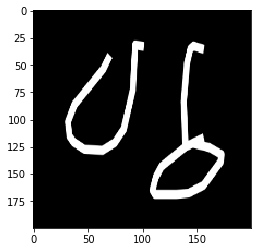

In [63]:
# try a label and its image
this = 0
plt.imshow(false_images[this], cmap='gray')
print(label[this])

In [65]:
len(false_images)

793

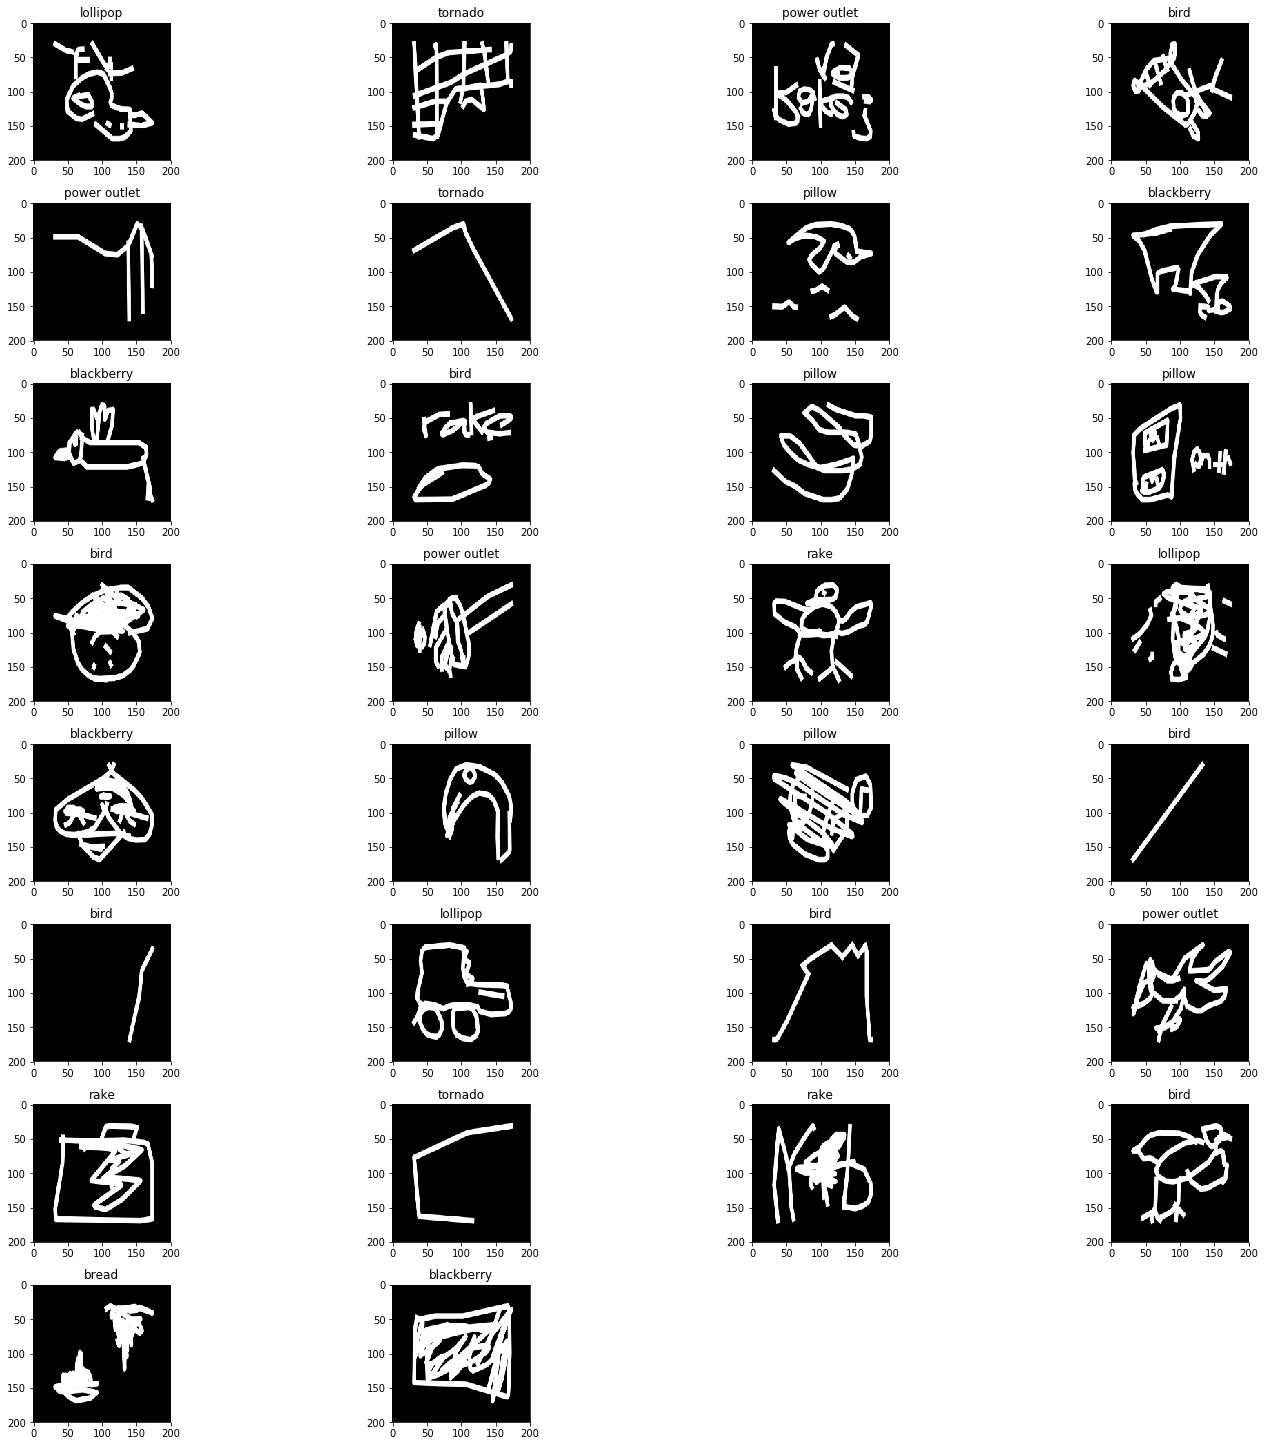

In [66]:
plt.figure(figsize=(20,20))
columns = 4


# slice between total number of false images, keep slicing between 30 images (e.g: lower = 200, upper = 230)

lower = 700
upper = 730 

for i, image in enumerate(false_images[lower:upper]):
    ax = plt.subplot(len(false_images[lower:upper]) / columns + 1, columns, i + 1)
    ax.set_title(label[i])
    plt.imshow(image, cmap='gray') # binary
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)